In [ ]:
!pip install --upgrade pip

In [ ]:
!pip3 install googletrans==3.1.0a0 #translation
!pip install -U spacy #summarization

In [ ]:
#web scrapping
import requests
from bs4 import BeautifulSoup

#translation
from googletrans import Translator, constants

#summarization
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
from string import punctuation
from collections import Counter
from heapq import nlargest

# **WEB SCRAPPING**

In [ ]:
r = requests.get('https://www.divyabhaskar.co.in/utility/automobile/news/this-suv-will-also-run-on-e-20-fuel-the-information-was-leaked-before-the-launch-131086628.html')
 
# check status code for response received
# success code - 200
print(r)
 
# print content of request
print(r.content)

<Response [200]>
b'<!DOCTYPE html><html lang="gu"><head><meta http-equiv="Content-Type" content="text/html; charset=utf-8"><meta http-equiv="X-UA-Compatible" content="IE=edge"><meta id="Viewport" name="viewport" content="width=device-width,initial-scale=1"><meta name="googlebot" content="noodp, noydir"><meta name="theme-color" content="#f89c1d"><meta name="robots" content="max-image-preview:large"><link rel="preconnect" href="https://www.google-analytics.com"><link rel="preconnect" href="https://www.googletagmanager.com"><link rel="preconnect" href="https://images.bhaskarassets.com"><link rel="dns-prefetch" href="https://ib.adnxs.com"><link rel="dns-prefetch" href="https://fastlane.rubiconproject.com"><link rel="dns-prefetch" href="hbopenbid.pubmatic.com"><link rel="dns-prefetch" href="https://securepubads.g.doubleclick.net"><link rel="dns-prefetch" href="https://tpc.googlesyndication.com"><link rel="dns-prefetch" href="https://www.googletagservices.com"><link rel="dns-prefetch" href="

In [ ]:
soup = BeautifulSoup(r.content, 'html.parser')
titlesHTML=soup.find_all('h1')
content = soup.find_all('p')
 
print(titlesHTML)
print(content)

[<h1 style="word-break:break-word"><span class="c599c552" style="color:#879de9">BS6-2 એન્જિન સાથે લોન્ચ થશે મહિન્દ્રા થાર:</span>E-20 ફ્યૂલ પર પણ ચાલશે આ SUV, લોન્ચિંગ પહેલા જ લીક થઈ માહિતી</h1>]
[<p class="" style="word-break:break-word">મહિન્દ્રા એન્ડ મહિન્દ્રાએ નવા એન્જિન સાથે ‘થાર’ને ભારતીય માર્કેટમાં લોન્ચ કરી છે, જેને કંપનીએ રિયલ ડ્રાઈવિંગ એમિશન નોર્મ્સ (RDE) અને BS6 ફેઝ-2 અંતર્ગત અપડેટ કરશે પરંતુ, લોન્ચ પહેલા જ તેની અમુક માહિતી લીક થઈ ગઈ હતી.</p>, <p class="" style="word-break:break-word">રિપોર્ટ મુજબ તેમાં BS6 ફેઝ-2 મોડેલમાં RDE નોર્મ્સ અંતર્ગત E20 પેટ્રોલ અને ડિઝલવાળુ એન્જિન હશે. તે સિવાય કંપની પોતાની વર્તમાન SUV પોર્ટફોલિયોને પણ અપડેટ કરવાનો પ્લાન બનાવી રહી છે. જેમાં SUV 300, SUV 700, સ્કોર્પિયો, બોલેરો, બોલેરો નિયો અને મરાઝો MPV સામેલ છે.</p>, <p class="" style="word-break:break-word">1 એપ્રિલથી શરુ થનારા નવા નાણાકીય વર્ષથી આખા દેશમાં રિયલ ડ્રાઈવિંગ એમિશન નોર્મ્સ લાગૂ થવા જઈ રહ્યા છે. તેના કારણે જ ઓટોમોબાઈલ કંપનીઓ ગાડીઓનાં એન્જિનને અપડેટ કરી રહી છે. આ નોર્મ્સને લાગૂ કરવા પાછ

In [ ]:
titles=[]
for line in titlesHTML:
  titles.append(line.text)
titles

['BS6-2 એન્જિન સાથે લોન્ચ થશે મહિન્દ્રા થાર:E-20 ફ્યૂલ પર પણ ચાલશે આ SUV, લોન્ચિંગ પહેલા જ લીક થઈ માહિતી']

In [ ]:
text=[]

for line in content:
  text.append(line.text)

text

['મહિન્દ્રા એન્ડ મહિન્દ્રાએ નવા એન્જિન સાથે ‘થાર’ને ભારતીય માર્કેટમાં લોન્ચ કરી છે, જેને કંપનીએ રિયલ ડ્રાઈવિંગ એમિશન નોર્મ્સ (RDE) અને BS6 ફેઝ-2 અંતર્ગત અપડેટ કરશે પરંતુ, લોન્ચ પહેલા જ તેની અમુક માહિતી લીક થઈ ગઈ હતી.',
 'રિપોર્ટ મુજબ તેમાં BS6 ફેઝ-2 મોડેલમાં RDE નોર્મ્સ અંતર્ગત E20 પેટ્રોલ અને ડિઝલવાળુ એન્જિન હશે. તે સિવાય કંપની પોતાની વર્તમાન SUV પોર્ટફોલિયોને પણ અપડેટ કરવાનો પ્લાન બનાવી રહી છે. જેમાં SUV 300, SUV 700, સ્કોર્પિયો, બોલેરો, બોલેરો નિયો અને મરાઝો MPV સામેલ છે.',
 '1 એપ્રિલથી શરુ થનારા નવા નાણાકીય વર્ષથી આખા દેશમાં રિયલ ડ્રાઈવિંગ એમિશન નોર્મ્સ લાગૂ થવા જઈ રહ્યા છે. તેના કારણે જ ઓટોમોબાઈલ કંપનીઓ ગાડીઓનાં એન્જિનને અપડેટ કરી રહી છે. આ નોર્મ્સને લાગૂ કરવા પાછળ સરકારનો ઉદ્દેશ્ય ગાડીઓથી થતા પ્રદૂષણને ઘટાડવાનો છે.',
 'જાન્યુઆરીમાં લોન્ચ થશે થારનું બજેટફ્રેન્ડલી વેરિયન્ટઆ પહેલા આ વર્ષે જાન્યુઆરી મહિનામાં કંપનીએ થારનાં બજેટફ્રેન્ડલી SUV વેરિયન્ટને ₹9.99 લાખની કિંમતે લોન્ચ કરી હતી. જો કે, હવે તેની કિંમતમાં 50 હજારનો વધારો કરી દેવામાં આવ્યો છે. વર્તમાન થાર 4*4 મોડેલ 2.2 લિટર ડિઝલ એન

# **TRANSLATION**

In [ ]:
translator = Translator()

In [ ]:
for t in titles:
  translation = translator.translate(t)
  trans_title = translation.text

trans_title

'Mahindra Thar to be launched with BS6-2 engine: This SUV will also run on E-20 fuel, information leaked before the launch'

In [ ]:
trans_text=[]

for t in text:
  translation = translator.translate(t)
  trans_text.append(translation.text)

text_final=",".join(trans_text)
text_final

"Mahindra & Mahindra has launched the 'Thar' in the Indian market with a new engine, which the company will update under Real Driving Emission Norms (RDE) and BS6 Phase-II, but some information was leaked before the launch.,According to the report, it will have E20 petrol and diesel engines under RDE norms in the BS6 Phase-II model. Apart from that, the company is also planning to update its current SUV portfolio. These include SUV 300, SUV 700, Scorpio, Bolero, Bolero Neo and Marazzo MPV.,Real driving emission norms are going to be implemented across the country from the new financial year starting from April 1. That is why automobile companies are updating the engines of cars. The government's objective behind implementing these norms is to reduce the pollution caused by vehicles.,Budget-friendly variant of Thar to be launched in January Earlier this year in January, the company launched the budget-friendly SUV variant of Thar at a price of ₹ 9.99 lakh. However, now its price has bee

# **EXTRACTIVE SUMMARIZATION**

In [ ]:
# Load the model (English) into spaCy
nlp = spacy.load("en_core_web_sm")

In [ ]:
doc = nlp(text_final)
print([(w.text, w.pos_) for w in doc])

In [ ]:
len(list(doc.sents))

In [ ]:
# Filtering Tokens
keyword = []
stopwords = list(STOP_WORDS)
pos_tag = ['PROPN','ADJ','NOUN','VERB','AUX','CCONJ','DET']

for token in doc:
  if(token.text in stopwords or token.text in punctuation):
    continue
  if(token.pos_ in pos_tag):
    keyword.append(token.text)

In [ ]:
freq_word = Counter(keyword)
freq_word.most_common(10)

In [ ]:
# Normalization
max_freq = Counter(keyword).most_common(1)[0][1]

for word in freq_word.keys():
  freq_word[word] = (freq_word[word]/max_freq)

freq_word.most_common(10)

In [ ]:
# Weighing sentences
sent_strength = {}

for sent in doc.sents:
  for word in sent:
    if word.text in freq_word.keys():
      if sent in sent_strength.keys():
        sent_strength[sent]+=freq_word[word.text]
      else:
        sent_strength[sent]=freq_word[word.text]

print(sent_strength)

In [ ]:
# Summarizing the string
summarized_sentences = nlargest(5,sent_strength,key=sent_strength.get)
print(summarized_sentences)

In [ ]:
final_sentences = [w.text for w in summarized_sentences]
summary = ' '.join(final_sentences)
print(summary)

In [ ]:
!pip3 install googletrans==3.1.0a0 #translation

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 59.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 7.2 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-3.1.0a0-py3-none-any.whl size=16368 sha256=d1af33aa0dc0309e529819af572da1e03b629f5dc0fa1cfdf1dead9cdf122be2
  Stored in directory: /root/.cache/pip/wheels/ae/e1/6c/5137bc3f35aa130deea71575e165cc4f4f0680a88f3d90a636
Successfully built googletrans


In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d gowrishankarp/newspaper-text-summarization-cnn-dailymail

newspaper-text-summarization-cnn-dailymail.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/newspaper-text-summarization-cnn-dailymail.zip

Archive:  /content/newspaper-text-summarization-cnn-dailymail.zip
replace cnn_dailymail/test.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
!pip install rouge

import numpy as np
import pandas as pd

import re
import string
import csv
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow import keras
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM, Dense, Input, Embedding, Concatenate, TimeDistributed, Bidirectional, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from keras.utils.vis_utils import plot_model
from rouge import Rouge

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
train_data = pd.read_csv('/content/cnn_dailymail/train.csv')
test_data = pd.read_csv('/content/cnn_dailymail/test.csv')

train_data.head()

,id,article,highlights
0,0001d1afc246a7964130f43ae940af6bc6c57f01,By . Associated Press . PUBLISHED: . 14:11 EST...,"Bishop John Folda, of North Dakota, is taking ..."
1,0002095e55fcbd3a2f366d9bf92a95433dc305ef,(CNN) -- Ralph Mata was an internal affairs li...,Criminal complaint: Cop used his role to help ...
2,00027e965c8264c35cc1bc55556db388da82b07f,A drunk driver who killed a young woman in a h...,"Craig Eccleston-Todd, 27, had drunk at least t..."
3,0002c17436637c4fe1837c935c04de47adb18e9a,(CNN) -- With a breezy sweep of his pen Presid...,Nina dos Santos says Europe must be ready to a...
4,0003ad6ef0c37534f80b55b4235108024b407f0b,Fleetwood are the only team still to have a 10...,Fleetwood top of League One after 2-0 win at S...


In [ ]:
train_data = train_data.drop(['id'], axis=1)
train_data = train_data.reset_index(drop=True)
test_data = test_data.drop(['id'], axis=1)
test_data = test_data.reset_index(drop=True)

In [ ]:
contractions = { 
"ain't": "am not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he's": "he is",
"how'd": "how did",
"how'll": "how will",
"how's": "how is",
"i'd": "i would",
"i'll": "i will",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'll": "it will",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"must've": "must have",
"mustn't": "must not",
"needn't": "need not",
"oughtn't": "ought not",
"shan't": "shall not",
"sha'n't": "shall not",
"she'd": "she would",
"she'll": "she will",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"that'd": "that would",
"that's": "that is",
"there'd": "there had",
"there's": "there is",
"they'd": "they would",
"they'll": "they will",
"they're": "they are",
"they've": "they have",
"wasn't": "was not",
"we'd": "we would",
"we'll": "we will",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"where'd": "where did",
"where's": "where is",
"who'll": "who will",
"who's": "who is",
"won't": "will not",
"wouldn't": "would not",
"you'd": "you would",
"you'll": "you will",
"you're": "you are"
}

In [ ]:
def clean_text(text, remove_stopwords=True):
    text = text.lower()
    text = text.split()
    tmp = []
    for word in text:
        if word in contractions:
            tmp.append(contractions[word])
        else:
            tmp.append(word)
    text = ' '.join(tmp)
    
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'\<a href', ' ', text)
    text = re.sub(r'&amp;', '', text) 
    text = re.sub(r'[_"\-;%()|+&=*%.,!?:#$@\[\]/]', ' ', text)
    text = re.sub(r'<br />', ' ', text)
    text = re.sub(r'\'', ' ', text)
    
    if remove_stopwords:
        text = text.split()
        stops = set(stopwords.words('english'))
        text = [w for w in text if w not in stops]
        text = ' '.join(text)
        
    return text

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

clean_summaries = []
for summary in train_data.highlights:
    clean_summaries.append(clean_text(summary, remove_stopwords=False))
print('Cleaning Summaries Complete')
    
clean_texts = []
for text in train_data.article:
    clean_texts.append(clean_text(text))
print('Cleaning Texts Complete')
del train_data

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Cleaning Summaries Complete
Cleaning Texts Complete


In [ ]:
clean_df = pd.DataFrame()
clean_df['text'] = clean_texts[:110000]
clean_df['summary'] = clean_summaries[:110000]
clean_df['summary'].replace('', np.nan, inplace=True)
clean_df.dropna(axis=0, inplace=True)

clean_df['summary'] = clean_df['summary'].apply(lambda x: '<sostok>' + ' ' + x + ' ' + '<eostok>')
del clean_texts
del clean_summaries

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(clean_df['text'], clean_df['summary'], test_size=0.1, random_state=0)
del clean_df

In [ ]:
t_tokenizer = Tokenizer()
t_tokenizer.fit_on_texts(list(train_x))

thresh = 4
count = 0
total_count = 0
frequency = 0
total_frequency = 0

for key, value in t_tokenizer.word_counts.items():
    total_count += 1
    total_frequency += value
    if value < thresh:
        count += 1
        frequency += value

In [ ]:
print('% of rare words in vocabulary: ', (count/total_count)*100.0)
print('Total Coverage of rare words: ', (frequency/total_frequency)*100.0)
t_max_features = total_count - count
print('Text Vocab: ', t_max_features)

% of rare words in vocabulary:  60.00719413677853
Total Coverage of rare words:  0.7458147584629847
Text Vocab:  133418


In [ ]:
s_tokenizer = Tokenizer()
s_tokenizer.fit_on_texts(list(train_y))

thresh = 6
count = 0
total_count = 0
frequency = 0
total_frequency = 0

for key, value in s_tokenizer.word_counts.items():
    total_count += 1
    total_frequency += value
    if value < thresh:
        count += 1
        frequency += value

In [ ]:
print('% of rare words in vocabulary: ', (count/total_count)*100.0)
print('Total Coverage of rare words: ', (frequency/total_frequency)*100.0)
s_max_features = total_count-count
print('Summary Vocab: ', s_max_features)

% of rare words in vocabulary:  70.11489659306625
Total Coverage of rare words:  2.4837378859339996
Summary Vocab:  29912


In [ ]:
maxlen_text = 800
maxlen_summ = 150

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences




In [ ]:
train_x = list(map(str, train_x))


In [ ]:
val_x = test_x
t_tokenizer = Tokenizer(num_words=t_max_features)
t_tokenizer.fit_on_texts(list(train_x))

train_x_seq = t_tokenizer.texts_to_sequences(train_x)
val_x_seq = t_tokenizer.texts_to_sequences(val_x)

train_x_padded = pad_sequences(train_x_seq, maxlen=maxlen_text, padding='post')
val_x_padded = pad_sequences(val_x_seq, maxlen=maxlen_text, padding='post')

In [ ]:
val_y = test_y
s_tokenizer = Tokenizer(num_words=s_max_features)
s_tokenizer.fit_on_texts(list(train_y))
train_y = s_tokenizer.texts_to_sequences(train_y)
val_y = s_tokenizer.texts_to_sequences(val_y)

train_y = pad_sequences(train_y, maxlen=maxlen_summ, padding='post')
val_y = pad_sequences(val_y, maxlen=maxlen_summ, padding='post')

In [ ]:
import numpy as np

train_x = np.array(train_x_padded)
train_y = np.array(train_y)
val_x = np.array(val_x_padded)
val_y = np.array(val_y)

print("Training Sequence", train_x.shape)
print('Target Values Shape', train_y.shape)
print('Test Sequence', val_x.shape)
print('Target Test Shape', val_y.shape)


Training Sequence (99000, 800)
Target Values Shape (99000, 150)
Test Sequence (11000, 800)
Target Test Shape (11000, 150)


In [ ]:
!kaggle datasets download -d anindya2906/glove6b

glove6b.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/glove6b.zip

Archive:  /content/glove6b.zip
replace glove.6B.100d.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: N


In [ ]:
embeding_index = {}
embed_dim = 100
with open('/content/glove.6B.100d.txt') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embeding_index[word] = coefs

In [ ]:
t_embed = np.zeros((t_max_features, embed_dim))
for word, i in t_tokenizer.word_index.items():
    vec = embeding_index.get(word)
    if i < t_max_features and vec is not None:
        t_embed[i] = vec

In [ ]:
s_embed = np.zeros((s_max_features, embed_dim))
for word, i in s_tokenizer.word_index.items():
    vec = embeding_index.get(word)
    if i < s_max_features and vec is not None:
        s_embed[i] = vec

In [ ]:
del embeding_index

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 800)]        0           []                               
                                                                                                  
 embedding (Embedding)          (None, 800, 100)     13341800    ['input_1[0][0]']                
                                                                                                  
 input_2 (InputLayer)           [(None, None)]       0           []                               
                                                                                                  
 bidirectional (Bidirectional)  [(None, 256),        234496      ['embedding[0][0]']              
                                 (None, 128),                                                 

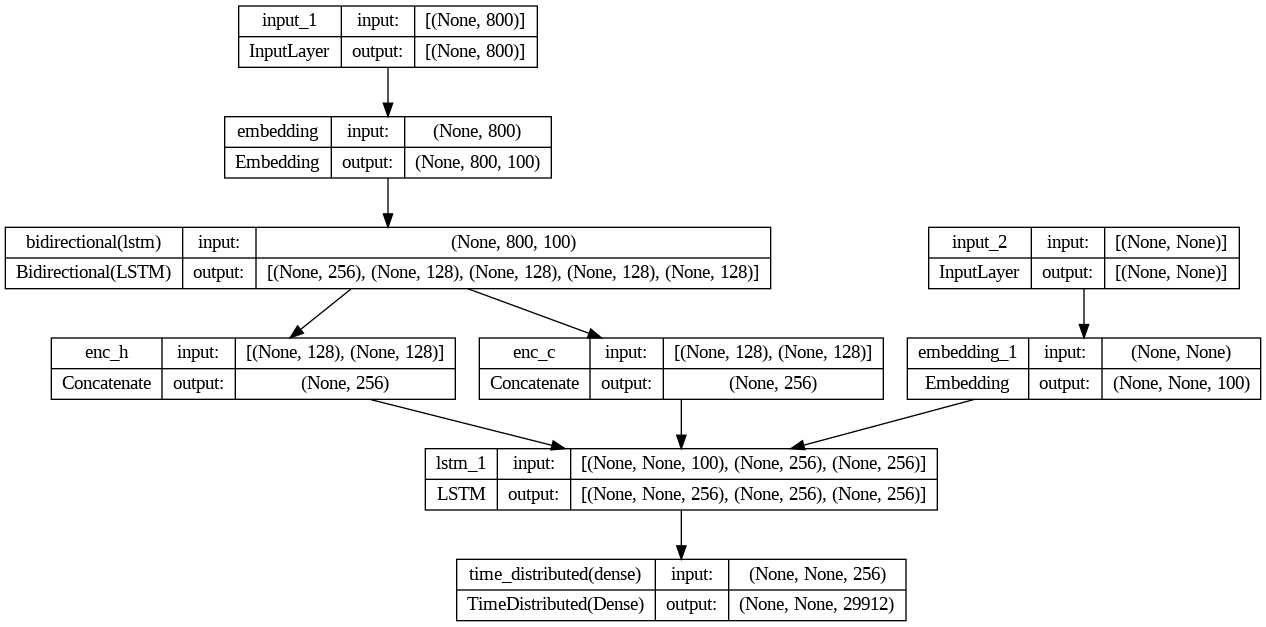

In [ ]:
latent_dim = 128
# Encoder
enc_input = Input(shape=(maxlen_text, ))
enc_embed = Embedding(t_max_features, embed_dim, input_length=maxlen_text, weights=[t_embed], trainable=False)(enc_input)
# h_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
# h_out, _, _ = h_lstm(enc_embed)
enc_lstm = Bidirectional(LSTM(latent_dim, return_state=True))
enc_output, enc_fh, enc_fc, enc_bh, enc_bc = enc_lstm(enc_embed)
enc_h = Concatenate(axis=-1, name='enc_h')([enc_fh, enc_bh])
enc_c = Concatenate(axis=-1, name='enc_c')([enc_fc, enc_bc])
#Decoder
dec_input = Input(shape=(None, ))
dec_embed = Embedding(s_max_features, embed_dim, weights=[s_embed], trainable=False)(dec_input)
dec_lstm = LSTM(latent_dim*2, return_sequences=True, return_state=True, dropout=0.3, recurrent_dropout=0.2)
dec_outputs, _, _ = dec_lstm(dec_embed, initial_state=[enc_h, enc_c])

dec_dense = TimeDistributed(Dense(s_max_features, activation='softmax'))
dec_output = dec_dense(dec_outputs)

model = Model([enc_input, dec_input], dec_output)
model.summary()

plot_model(
    model,
    to_file='./seq2seq_encoder_decoder.png',
    show_shapes=True,
    show_layer_names=True,
    rankdir='TB',
    expand_nested=False,
    dpi=96)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam')
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=2)
model.fit([train_x, train_y[:, :-1]], train_y.reshape(train_y.shape[0], train_y.shape[1], 1)[:, 1:], epochs=5, callbacks=[early_stop], batch_size=100, verbose=1, validation_data=([val_x, val_y[:, :-1]], val_y.reshape(val_y.shape[0], val_y.shape[1], 1)[:, 1:]))

In [ ]:
enc_model = Model(inputs=enc_input, outputs=[enc_h, enc_c])

dec_init_state_h = Input(shape=(latent_dim*2, ))
dec_init_state_c = Input(shape=(latent_dim*2, ))

dec_out, dec_h, dec_c = dec_lstm(dec_embed, initial_state=[dec_init_state_h, dec_init_state_c])
dec_final = dec_dense(dec_out)

dec_model = Model([dec_input]+[dec_init_state_h, dec_init_state_c], [dec_final]+[dec_h, dec_c])

In [ ]:
import pickle

# Save encoder model
enc_model.save('./encoder_model.h5')

# Save decoder model
dec_model.save('./decoder_model.h5')

# Save tokenizer
with open('./s_tokenizer.pkl', 'wb') as f:
    pickle.dump(s_tokenizer, f)

In [ ]:
def generate_summary(input_seq):
    h, c = enc_model.predict(input_seq)
    
    next_token = np.zeros((1, 1))
    next_token[0, 0] = s_tokenizer.word_index['sostok']
    output_seq = ''
    
    stop = False
    count = 0
    
    while not stop:
        if count > 100:
            break
        decoder_out, state_h, state_c = dec_model.predict([next_token]+[h, c])
        token_idx = np.argmax(decoder_out[0, -1, :])
        
        if token_idx == s_tokenizer.word_index['eostok']:
            stop = True
        elif token_idx > 0 and token_idx != s_tokenizer.word_index['sostok']:
            token = s_tokenizer.index_word[token_idx]
            output_seq = output_seq + ' ' + token
        
        next_token = np.zeros((1, 1))
        next_token[0, 0] = token_idx
        h, c = state_h, state_c
        count += 1
        
    return output_seq

In [ ]:
model.predict(text_final)